<a href="https://colab.research.google.com/github/alptekinynk/RXR2024/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

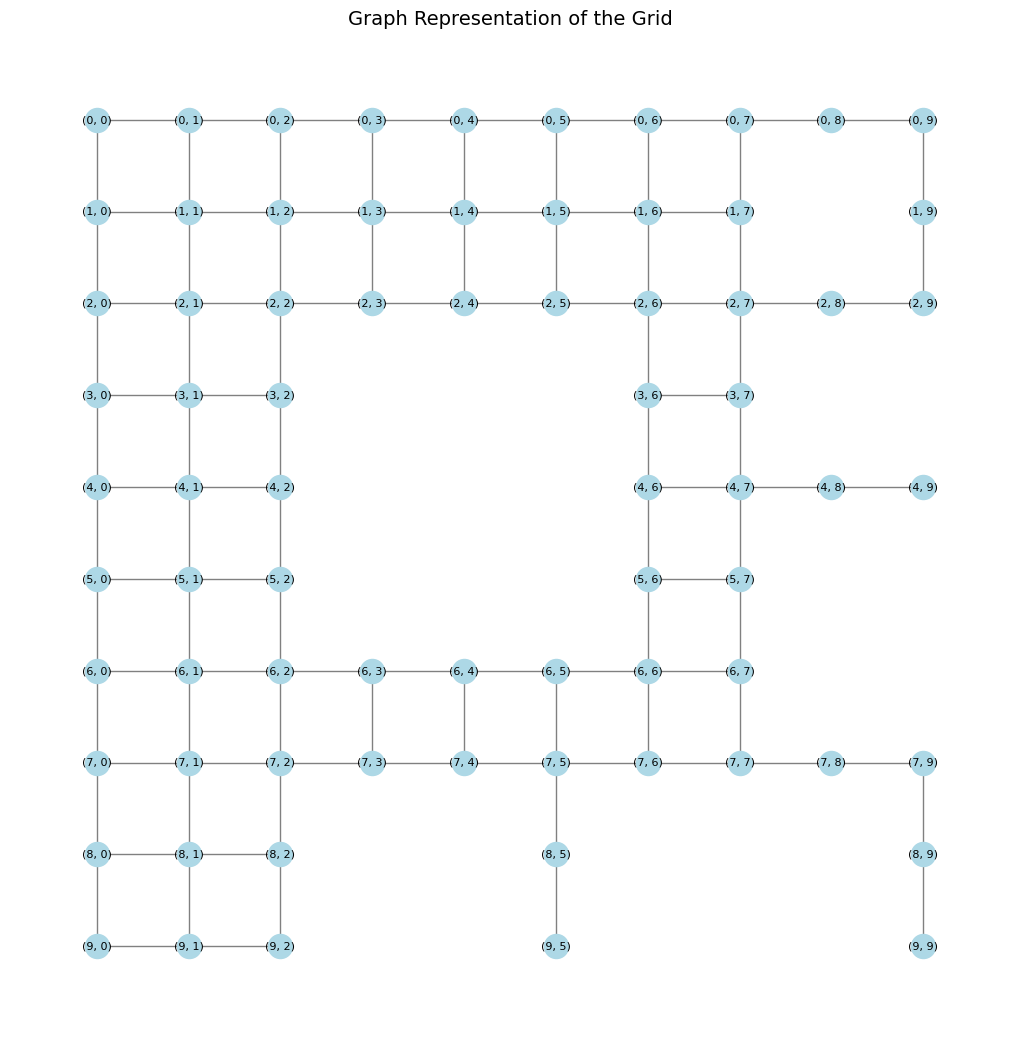

In [1]:
coordinates = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9),
    (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9),
    (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9),
    (3, 0), (3, 1), (3, 2), (3, 6), (3, 7),
    (4, 0), (4, 1), (4, 2), (4, 6), (4, 7), (4, 8), (4, 9),
    (5, 0), (5, 1), (5, 2), (5, 6), (5, 7),
    (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7),
    (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9),
    (8, 0), (8, 1), (8, 2), (8, 5), (8, 9),
    (9, 0), (9, 1), (9, 2), (9, 5), (9, 9)
]

import networkx as nx

graph = nx.Graph()

graph.add_nodes_from(coordinates)


for x, y in coordinates:
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        neighbor = (x + dx, y + dy)
        if neighbor in coordinates:
            graph.add_edge((x, y), neighbor)

import matplotlib.pyplot as plt


pos = {node: (node[1], -node[0]) for node in graph.nodes()}
plt.figure(figsize=(10, 10))
nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=300, font_size=8, edge_color="gray")
plt.title("Graph Representation of the Grid", fontsize=14)
plt.show()

In [2]:
#BFS
path = nx.shortest_path(graph, source=(1, 1), target=(9, 9))
print("Shortest Path:", path)

Shortest Path: [(1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9)]


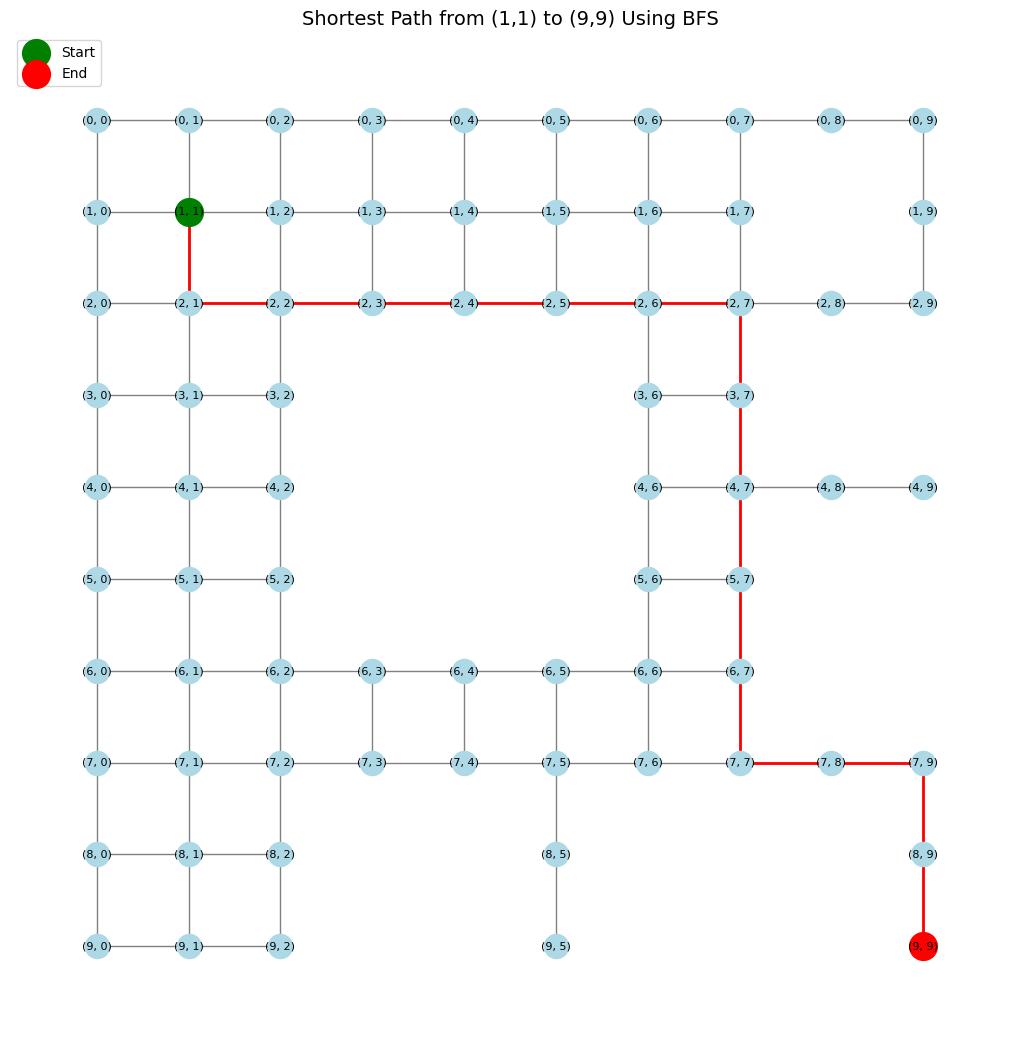

In [3]:
path_edges = list(zip(path, path[1:]))


plt.figure(figsize=(10, 10))
pos = {node: (node[1], -node[0]) for node in graph.nodes()}
nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=300, font_size=8, edge_color="gray")


nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color="red", width=2)


nx.draw_networkx_nodes(graph, pos, nodelist=[(1, 1)], node_color="green", node_size=400, label="Start")
nx.draw_networkx_nodes(graph, pos, nodelist=[(9, 9)], node_color="red", node_size=400, label="End")

plt.title("Shortest Path from (1,1) to (9,9) Using BFS", fontsize=14)
plt.legend(loc="upper left")
plt.show()

In [5]:
def dfs_path(graph, start, target):
    stack = [(start, [start])]
    visited = set()

    while stack:
        current, path = stack.pop()
        if current == target:
            return path
        if current not in visited:
            visited.add(current)
            for neighbor in graph.neighbors(current):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    return None

In [6]:
start_node = (1, 1)
end_node = (9, 9)

# DFS algoritmasını çalıştır
dfs_result = dfs_path(graph, start_node, end_node)

# Sonucu yazdır
print("DFS Path:", dfs_result)

DFS Path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (2, 8), (2, 9), (1, 9), (0, 9), (0, 8), (0, 7), (0, 6), (0, 5), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9)]


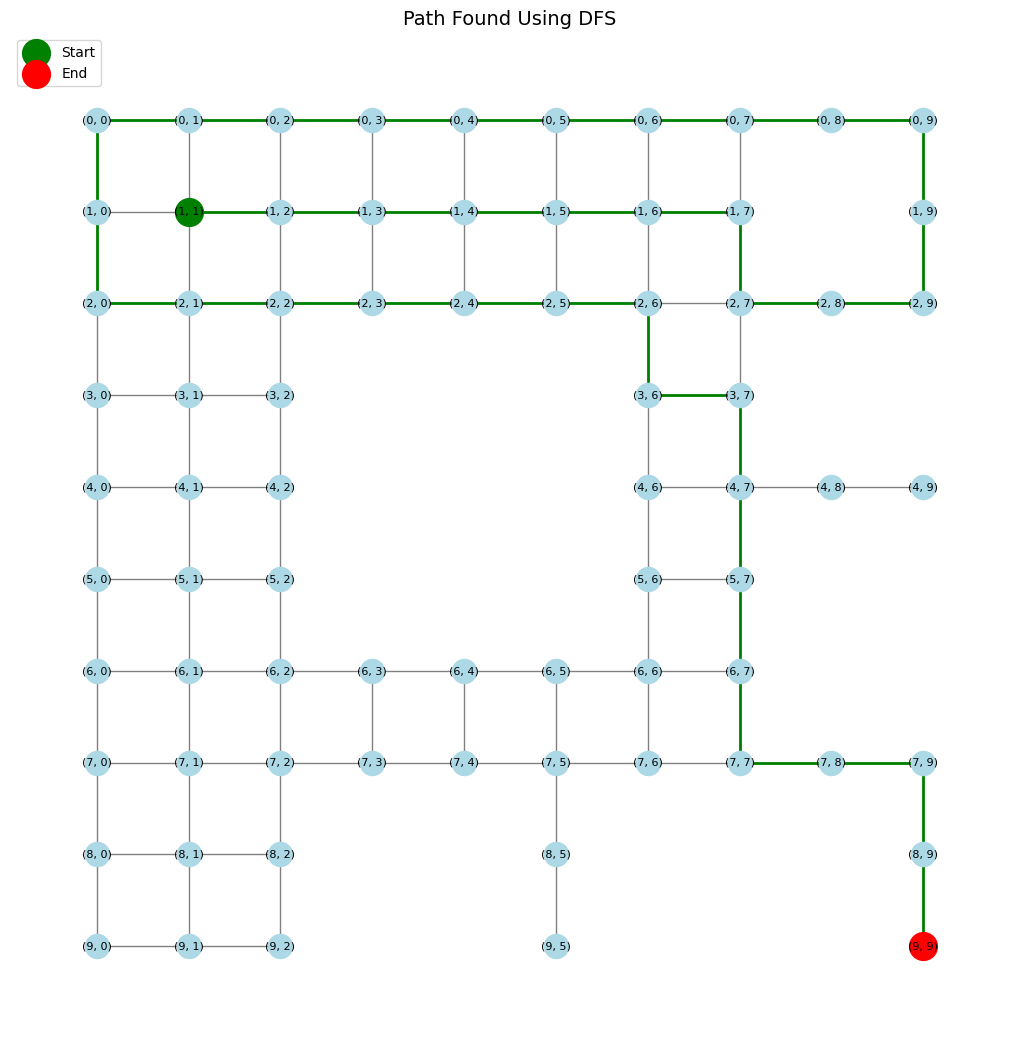

In [7]:
if dfs_result:

    dfs_edges = list(zip(dfs_result, dfs_result[1:]))

    plt.figure(figsize=(10, 10))
    pos = {node: (node[1], -node[0]) for node in graph.nodes()}
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=300, font_size=8, edge_color="gray")


    nx.draw_networkx_edges(graph, pos, edgelist=dfs_edges, edge_color="green", width=2)


    nx.draw_networkx_nodes(graph, pos, nodelist=[start_node], node_color="green", node_size=400, label="Start")
    nx.draw_networkx_nodes(graph, pos, nodelist=[end_node], node_color="red", node_size=400, label="End")

    plt.title("Path Found Using DFS", fontsize=14)
    plt.legend(loc="upper left")
    plt.show()
else:
    print("No path found using DFS.")